# PCA_house


# 索引
[探索房屋數據集](#探索房屋數據集)

[標準化資料](#標準化資料)

[取得特徵值](#取得特徵值)

[列出並排序全部的特徵值](#列出並排序全部的特徵值)

[列出前兩名的主成份特徵值](#列出前兩名的主成份特徵值)

## 探索房屋數據集

載入房屋數據集到數據框中

房屋數據集包含506個樣本，有14個特徵：
     
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [33]:
import pandas as pd

df = pd.read_csv('housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 將數據集分為訓練用跟測試用

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.iloc[:,:-1].values #測試資料為0~13筆資料
y = df['MEDV'].values  #標籤是最後一筆

In [36]:
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                     test_size=0.30,random_state = 1)

In [37]:
y_train[0]

20.4

In [38]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

In [39]:
y_train[0]

91

## 標準化資料

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print('訓練集資料標準化 \n%s' % X_train_std )
print('測試集標準化 \n%s' % X_test_std )

訓練集資料標準化 
[[-0.36571739 -0.48366069 -0.46209575 ...  1.18880212  0.43987709
  -0.64691635]
 [-0.4195265   0.58018848 -0.90151022 ...  0.58247746  0.231398
   0.20337764]
 [ 0.71430973 -0.48366069  0.99191363 ...  0.81567925  0.43987709
   1.13897622]
 ...
 [ 0.25011703 -0.48366069  0.99191363 ...  0.81567925  0.43987709
   0.88168661]
 [-0.40087863 -0.48366069 -0.74530641 ... -0.49025077  0.21666488
  -0.28643573]
 [-0.43028363 -0.48366069 -0.78034278 ...  0.34927567  0.43987709
  -0.57674646]]
測試集標準化 
[[-0.43390418  0.92062021 -1.33216561 ... -0.02384719  0.43987709
  -0.74735561]
 [-0.43671065  1.85680748 -1.09858981 ... -0.39697005  0.43987709
  -0.79551142]
 [-0.41276468 -0.48366069 -0.64165714 ... -0.25704898  0.39379457
   0.80326144]
 ...
 [-0.42877408 -0.48366069  2.09409945 ...  0.30263532  0.23150877
   0.68355985]
 [-0.37624897  0.36741864 -1.07085268 ... -2.54242652  0.39445922
  -0.46392428]
 [-0.32358288 -0.48366069 -0.46209575 ...  1.18880212  0.41373412
   0.9518565 ]]


## 取得特徵值

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.47922171, 0.10768154, 0.09641141, 0.06850391, 0.0634651 ,
       0.04877055, 0.03852658, 0.03088726, 0.02010375, 0.01673338,
       0.01279371, 0.0125927 , 0.00430839])

## 列出並排序全部的特徵值

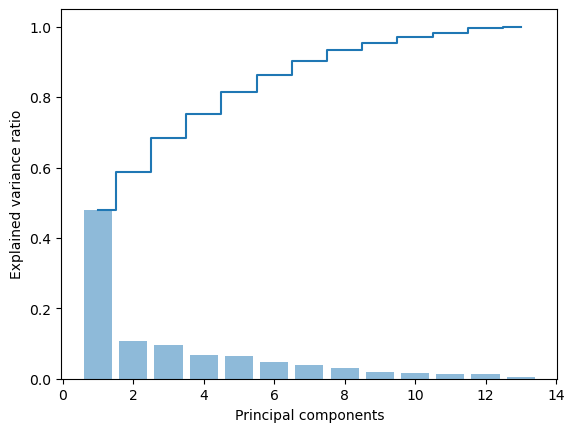

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

## 列出前兩名的主成份特徵值

In [43]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

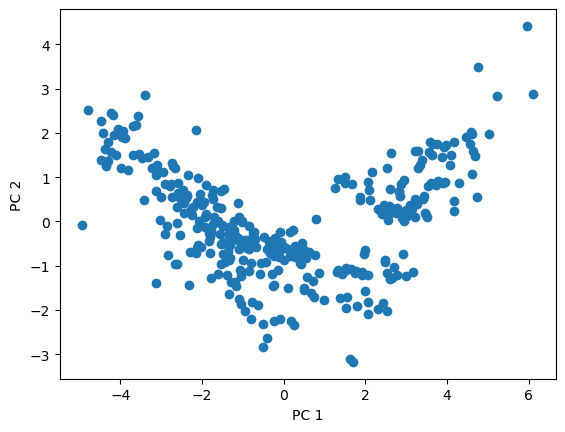

In [44]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),pca
                         ,SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10 )
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.036587301587301585
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}


In [41]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)

In [42]:
gs.score(X_test,y_test)

0.0